<a href="https://colab.research.google.com/github/rifkihariyanto25/Prediksi-Artis-Populer-2024/blob/main/Tubes_Kecerdasan_Buatan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Perhittungan Lagu dan Artis Terpopuler di 2023**

Memuat dan Membersihkan Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


path_file = 'spotify-2023.csv'
data_spotify = pd.read_csv(path_file, encoding='latin1')

# Membersihkan data
data_spotify['streams'] = pd.to_numeric(data_spotify['streams'], errors='coerce')
data_spotify['playlist_deezer'] = pd.to_numeric(data_spotify['in_deezer_playlists'], errors='coerce')
data_spotify['chart_shazam'] = pd.to_numeric(data_spotify['in_shazam_charts'], errors='coerce')

# Mengisi nilai kosong
data_spotify['streams'] = data_spotify['streams'].fillna(data_spotify['streams'].median())
data_spotify['playlist_deezer'] = data_spotify['playlist_deezer'].fillna(data_spotify['playlist_deezer'].median())
data_spotify['chart_shazam'] = data_spotify['chart_shazam'].fillna(data_spotify['chart_shazam'].median())


Analisis Korelasi


Matriks Korelasi:
                       streams  in_spotify_playlists  in_apple_playlists  \
streams               1.000000              0.789844            0.772103   
in_spotify_playlists  0.789844              1.000000            0.708277   
in_apple_playlists    0.772103              0.708277            1.000000   
playlist_deezer       0.438021              0.296555            0.444948   
chart_shazam          0.021616              0.087578            0.096608   

                      playlist_deezer  chart_shazam  
streams                      0.438021      0.021616  
in_spotify_playlists         0.296555      0.087578  
in_apple_playlists           0.444948      0.096608  
playlist_deezer              1.000000      0.078908  
chart_shazam                 0.078908      1.000000  


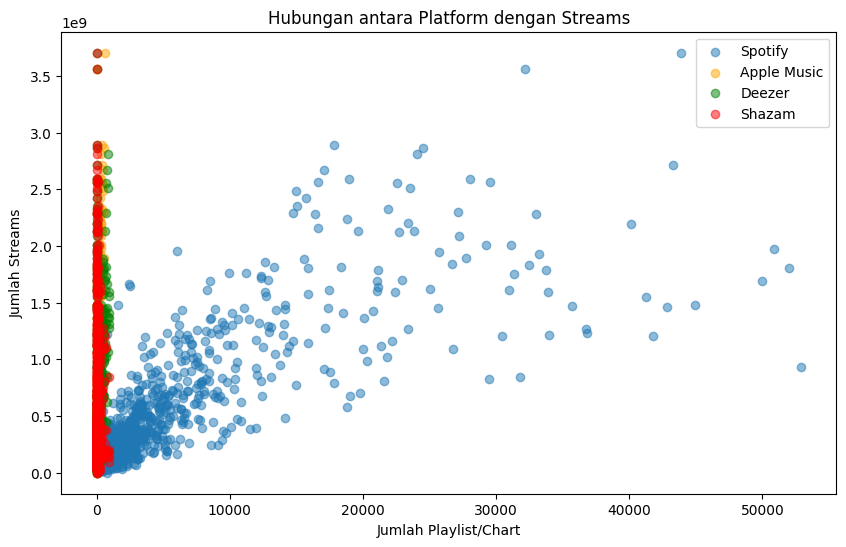

In [ ]:
# Analisis korelasi
matriks_korelasi = data_spotify[['streams', 'in_spotify_playlists', 'in_apple_playlists', 'playlist_deezer', 'chart_shazam']].corr()
print("\nMatriks Korelasi:")
print(matriks_korelasi)

# Visualisasi hubungan
plt.figure(figsize=(10, 6))
plt.scatter(data_spotify['in_spotify_playlists'], data_spotify['streams'], alpha=0.5, label='Spotify')
plt.scatter(data_spotify['in_apple_playlists'], data_spotify['streams'], alpha=0.5, label='Apple Music', color='orange')
plt.scatter(data_spotify['playlist_deezer'], data_spotify['streams'], alpha=0.5, label='Deezer', color='green')
plt.scatter(data_spotify['chart_shazam'], data_spotify['streams'], alpha=0.5, label='Shazam', color='red')
plt.xlabel('Jumlah Playlist/Chart')
plt.ylabel('Jumlah Streams')
plt.title('Hubungan antara Platform dengan Streams')
plt.legend()
plt.show()


Mengidentifikasi Lagu Terpopuler Tahun 2023


10 Lagu Terpopuler Tahun 2023:
                                track_name              artist(s)_name  \
12                                 Flowers                 Miley Cyrus   
6                          Ella Baila Sola  Eslabon Armado, Peso Pluma   
133  Shakira: Bzrp Music Sessions, Vol. 53           Shakira, Bizarrap   
34                                     TQG            Karol G, Shakira   
9                          La Bebe - Remix       Peso Pluma, Yng Lvcas   
49                     Die For You - Remix   Ariana Grande, The Weeknd   
10                               un x100to   Bad Bunny, Grupo Frontera   
16                       Cupid - Twin Ver.                 Fifty Fifty   
160                                    PRC   Natanael Cano, Peso Pluma   
131                                    OMG                    NewJeans   

          streams  
12   1.316856e+09  
6    7.259801e+08  
133  7.219756e+08  
34   6.189904e+08  
9    5.536341e+08  
49   5.187451e+08  
10   5.056714

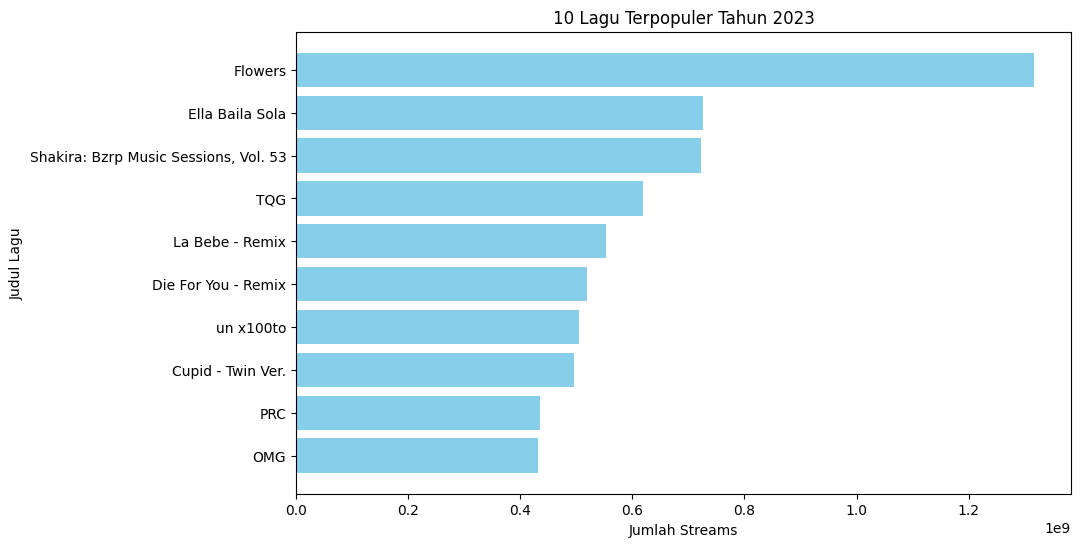

In [ ]:
# Filter data untuk tahun 2023
data_2023 = data_spotify[data_spotify['released_year'] == 2023]

# Mengidentifikasi 10 lagu teratas
lagu_teratas = data_2023[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(10)

# Tampilkan hasil
print("\n10 Lagu Terpopuler Tahun 2023:")
print(lagu_teratas)

# Visualisasi 10 Lagu Terpopuler
plt.figure(figsize=(10, 6))
plt.barh(lagu_teratas['track_name'], lagu_teratas['streams'], color='skyblue')
plt.xlabel('Jumlah Streams')
plt.ylabel('Judul Lagu')
plt.title('10 Lagu Terpopuler Tahun 2023')
plt.gca().invert_yaxis()
plt.show()


Identifikasi Artis Terpopuler Tahun 2023


10 Artis Terpopuler Tahun 2023:
artist(s)_name
Miley Cyrus                   1.316856e+09
Morgan Wallen                 9.466940e+08
Eslabon Armado, Peso Pluma    7.259801e+08
Shakira, Bizarrap             7.219756e+08
Jimin                         7.054457e+08
Fifty Fifty                   6.364776e+08
Karol G, Shakira              6.189904e+08
Peso Pluma, Yng Lvcas         5.536341e+08
NewJeans                      5.187948e+08
Ariana Grande, The Weeknd     5.187451e+08
Name: streams, dtype: float64


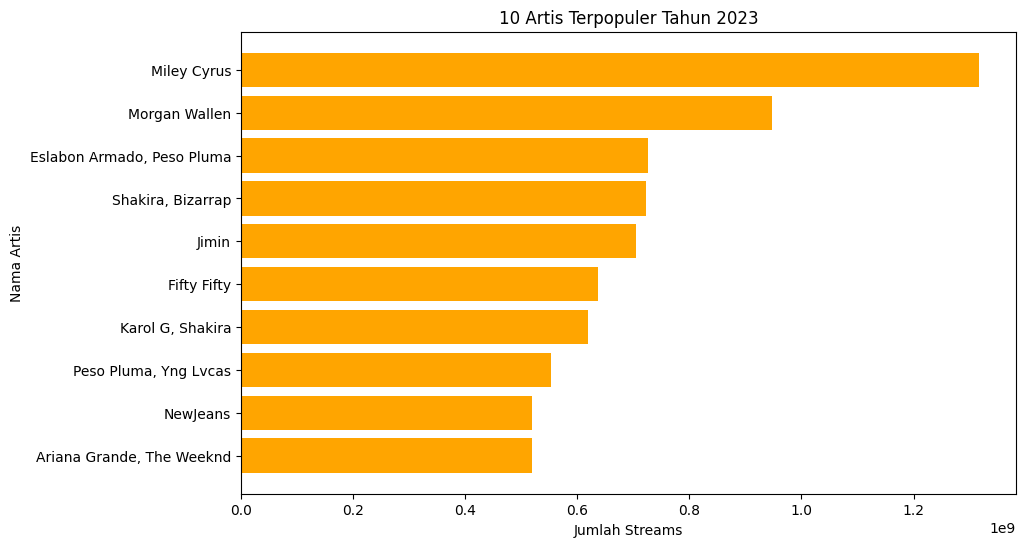

In [ ]:
# Mengidentifikasi 10 artis teratas berdasarkan jumlah streams agregat
artis_teratas = data_2023.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10)

# Tampilkan hasil
print("\n10 Artis Terpopuler Tahun 2023:")
print(artis_teratas)

# Visualisasi 10 Artis Terpopuler
plt.figure(figsize=(10, 6))
plt.barh(artis_teratas.index, artis_teratas.values, color='orange')
plt.xlabel('Jumlah Streams')
plt.ylabel('Nama Artis')
plt.title('10 Artis Terpopuler Tahun 2023')
plt.gca().invert_yaxis()
plt.show()


Menyiapkan dan Melatih Model Regresi

In [ ]:
# Menyiapkan data untuk regresi
grup_artis = data_spotify.groupby('artist(s)_name').agg({
    'streams': 'sum',
    'in_spotify_charts': 'sum',
    'in_apple_charts': 'sum',
    'playlist_deezer': 'sum',
    'chart_shazam': 'sum'
}).reset_index()

X = grup_artis[['in_spotify_charts', 'in_apple_charts', 'playlist_deezer', 'chart_shazam']]
y = grup_artis['streams']

# Split data untuk training dan testing
X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model regresi
model = LinearRegression()
model.fit(X_latih, y_latih)

# Memprediksi streams data uji
y_prediksi = model.predict(X_uji)
mse = mean_squared_error(y_uji, y_prediksi)
print(f"\nMean Squared Error: {mse}")



Mean Squared Error: 3.2113682966645766e+17


Prediksi Artis Terpopuler Tahun 2024


Prediksi 10 Artis Terpopuler Tahun 2024:
     artist(s)_name  prediksi_streams_2024
558    Taylor Swift           1.430024e+10
572      The Weeknd           1.177713e+10
223    Harry Styles           9.570555e+09
159      Ed Sheeran           7.044635e+09
43        Bad Bunny           6.547508e+09
498             SZA           6.125896e+09
38              BTS           6.057351e+09
431  Olivia Rodrigo           5.945453e+09
403       Mï¿½ï¿½ne           5.801043e+09
75       Bruno Mars           5.529225e+09


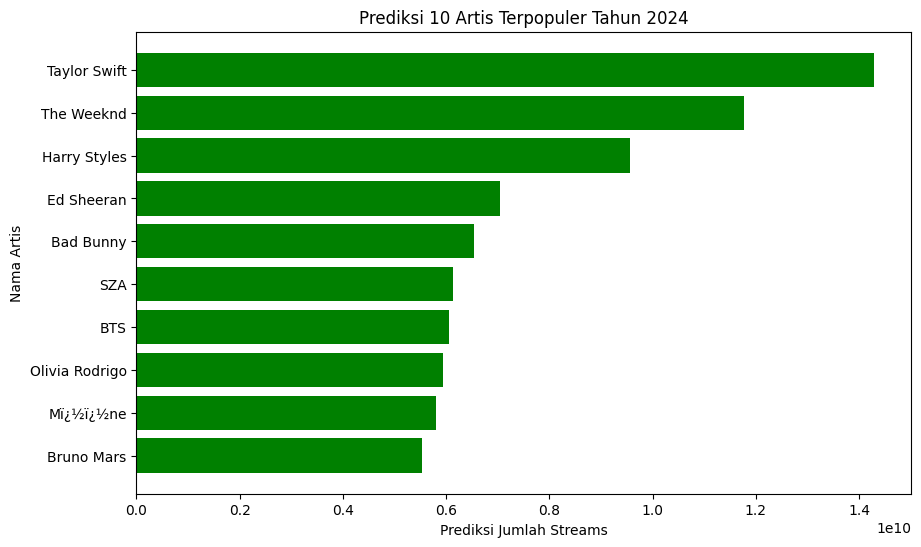

In [ ]:
# Memprediksi artis terpopuler tahun 2024
prediksi_streams = model.predict(X)
grup_artis['prediksi_streams_2024'] = prediksi_streams
artis_teratas_2024 = grup_artis[['artist(s)_name', 'prediksi_streams_2024']].sort_values(by='prediksi_streams_2024', ascending=False).head(10)

print("\nPrediksi 10 Artis Terpopuler Tahun 2024:")
print(artis_teratas_2024)

# Plot Prediksi 10 Artis Terpopuler Tahun 2024
plt.figure(figsize=(10, 6))
plt.barh(artis_teratas_2024['artist(s)_name'], artis_teratas_2024['prediksi_streams_2024'], color='green')
plt.xlabel('Prediksi Jumlah Streams')
plt.ylabel('Nama Artis')
plt.title('Prediksi 10 Artis Terpopuler Tahun 2024')
plt.gca().invert_yaxis()
plt.show()


Menghitung MSE untuk data training setelah model dilatih.


Mean Squared Error untuk Training: 5.830045156838998e+17


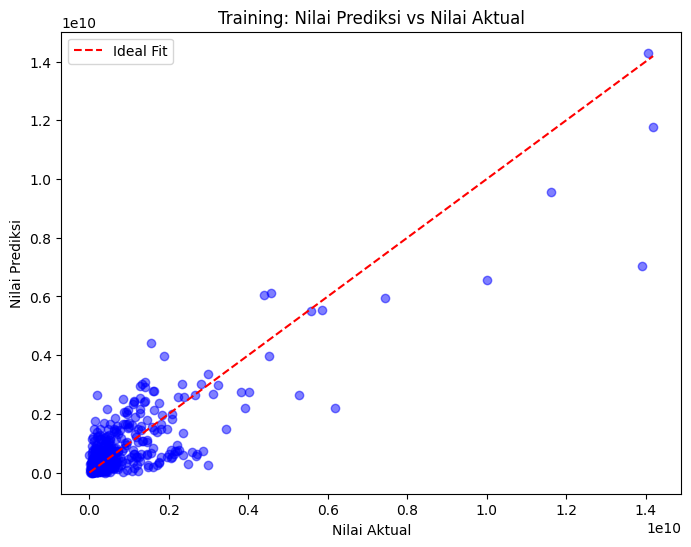

In [ ]:
# Prediksi untuk data training
y_pred_train = model.predict(X_latih)

# Menghitung Mean Squared Error (MSE) untuk data training
mse_train = mean_squared_error(y_latih, y_pred_train)
print(f"\nMean Squared Error untuk Training: {mse_train}")

# Visualisasi Prediksi vs Nilai Aktual pada data Training
plt.figure(figsize=(8, 6))
plt.scatter(y_latih, y_pred_train, alpha=0.5, color='blue')
plt.plot([y_latih.min(), y_latih.max()], [y_latih.min(), y_latih.max()], '--', color='red', label='Ideal Fit')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Training: Nilai Prediksi vs Nilai Aktual')
plt.legend()
plt.show()


Mengevaluasi MSE pada data testing dan membandingkan hasil prediksi dengan nilai aktual.


Mean Squared Error untuk Testing: 3.2113682966645766e+17


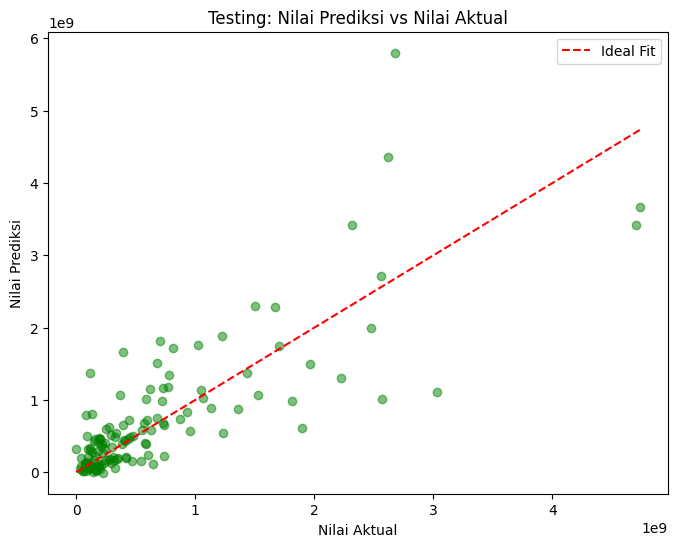

In [ ]:
# Prediksi untuk data testing
y_pred_test = model.predict(X_uji)

# Menghitung Mean Squared Error (MSE) untuk data testing
mse_test = mean_squared_error(y_uji, y_pred_test)
print(f"\nMean Squared Error untuk Testing: {mse_test}")

# Visualisasi Prediksi vs Nilai Aktual pada data Testing
plt.figure(figsize=(8, 6))
plt.scatter(y_uji, y_pred_test, alpha=0.5, color='green')
plt.plot([y_uji.min(), y_uji.max()], [y_uji.min(), y_uji.max()], '--', color='red', label='Ideal Fit')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Testing: Nilai Prediksi vs Nilai Aktual')
plt.legend()
plt.show()


Parameter

SCATTER PLOT

Setting 1 - 80% Testing, 20% Training
  MSE Training: 54597.09331561109
  MSE Testing: 113570.33704885254
  R2 Training: 0.15869832024361963
  R2 Testing: -0.03844450958111323

Setting 2 - 50% Testing, 50% Training
  MSE Training: 91905.9930704888
  MSE Testing: 112079.79353450527
  R2 Training: 0.07668664052419827
  R2 Testing: -0.12333367393895212



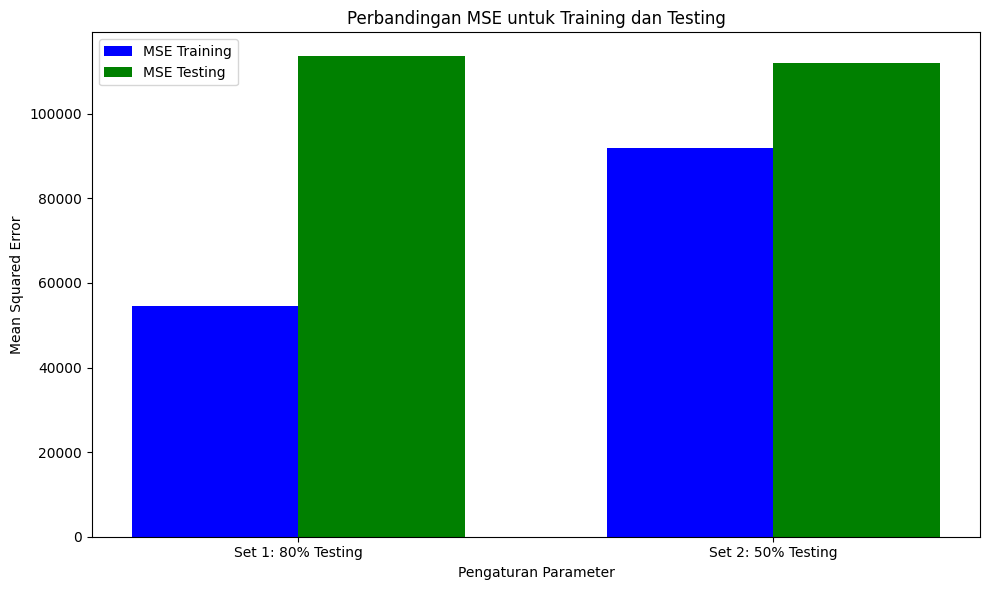

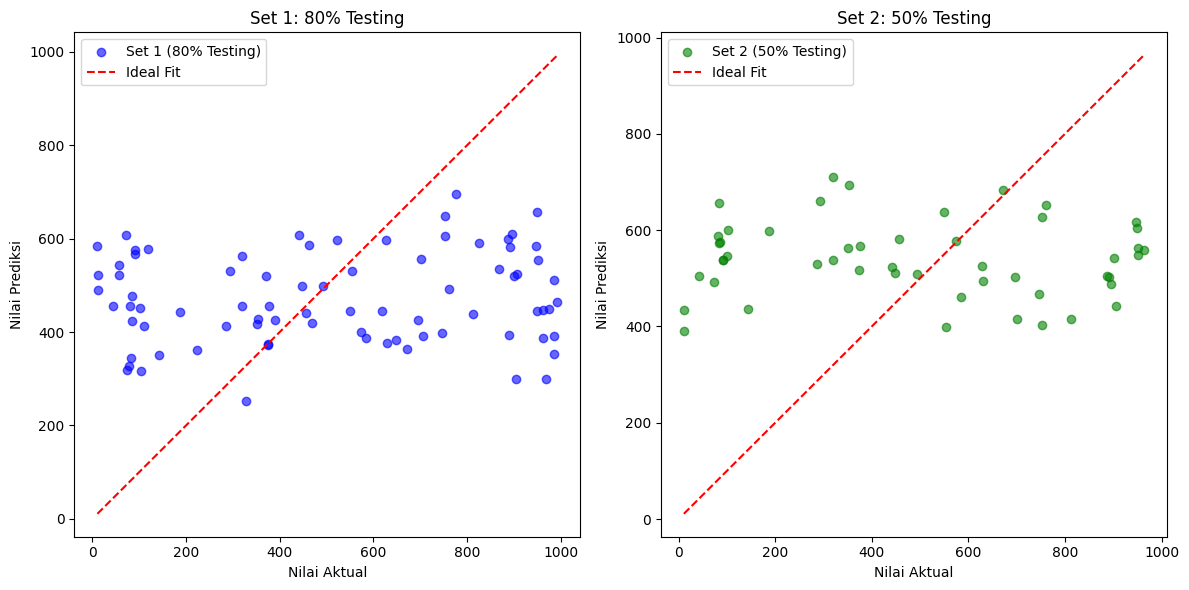

Analisis Hasil:
Set 2 (50% Testing, 50% Training) memiliki MSE Testing yang lebih rendah, menunjukkan generalisasi model yang lebih baik dibandingkan Set 1.
Set 1 memiliki skor R2 lebih tinggi pada Testing, menunjukkan prediksi yang lebih sesuai dengan data aktual pada Set 1.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Data Dummy untuk Demonstrasi (ganti dengan data Anda yang sebenarnya)
np.random.seed(42)
X = np.random.rand(100, 4)  # 100 sampel, 4 fitur
y = np.random.rand(100) * 1000

# Setting 1: 80% Testing, 20% Training
X_latih_1, X_uji_1, y_latih_1, y_uji_1 = train_test_split(X, y, test_size=0.8, random_state=42)
model_1 = LinearRegression()
model_1.fit(X_latih_1, y_latih_1)
y_prediksi_latih_1 = model_1.predict(X_latih_1)
y_prediksi_uji_1 = model_1.predict(X_uji_1)
mse_latih_1 = mean_squared_error(y_latih_1, y_prediksi_latih_1)
mse_uji_1 = mean_squared_error(y_uji_1, y_prediksi_uji_1)
r2_latih_1 = r2_score(y_latih_1, y_prediksi_latih_1)
r2_uji_1 = r2_score(y_uji_1, y_prediksi_uji_1)

# Setting 2: 50% Testing, 50% Training
X_latih_2, X_uji_2, y_latih_2, y_uji_2 = train_test_split(X, y, test_size=0.5, random_state=42)
model_2 = LinearRegression()
model_2.fit(X_latih_2, y_latih_2)
y_prediksi_latih_2 = model_2.predict(X_latih_2)
y_prediksi_uji_2 = model_2.predict(X_uji_2)
mse_latih_2 = mean_squared_error(y_latih_2, y_prediksi_latih_2)
mse_uji_2 = mean_squared_error(y_uji_2, y_prediksi_uji_2)
r2_latih_2 = r2_score(y_latih_2, y_prediksi_latih_2)
r2_uji_2 = r2_score(y_uji_2, y_prediksi_uji_2)

# Menampilkan Hasil MSE dan R2
print(f"Setting 1 - 80% Testing, 20% Training")
print(f"  MSE Training: {mse_latih_1}")
print(f"  MSE Testing: {mse_uji_1}")
print(f"  R2 Training: {r2_latih_1}")
print(f"  R2 Testing: {r2_uji_1}\n")

print(f"Setting 2 - 50% Testing, 50% Training")
print(f"  MSE Training: {mse_latih_2}")
print(f"  MSE Testing: {mse_uji_2}")
print(f"  R2 Training: {r2_latih_2}")
print(f"  R2 Testing: {r2_uji_2}\n")

# Visualisasi Hasil MSE
pengaturan = ['Set 1: 80% Testing', 'Set 2: 50% Testing']
mse_latih = [mse_latih_1, mse_latih_2]
mse_uji = [mse_uji_1, mse_uji_2]

# Bar Plot untuk Perbandingan MSE
x = np.arange(len(pengaturan))
lebar = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - lebar/2, mse_latih, lebar, label='MSE Training', color='blue')
plt.bar(x + lebar/2, mse_uji, lebar, label='MSE Testing', color='green')
plt.xticks(x, pengaturan)
plt.xlabel('Pengaturan Parameter')
plt.ylabel('Mean Squared Error')
plt.title('Perbandingan MSE untuk Training dan Testing')
plt.legend()
plt.tight_layout()
plt.show()

# Scatter Plot Perbandingan untuk Testing
plt.figure(figsize=(12, 6))

# Scatter Plot untuk Setting 1
plt.subplot(1, 2, 1)
plt.scatter(y_uji_1, y_prediksi_uji_1, alpha=0.6, color='blue', label='Set 1 (80% Testing)')
plt.plot([y_uji_1.min(), y_uji_1.max()], [y_uji_1.min(), y_uji_1.max()], '--', color='red', label='Ideal Fit')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Set 1: 80% Testing')
plt.legend()

# Scatter Plot untuk Setting 2
plt.subplot(1, 2, 2)
plt.scatter(y_uji_2, y_prediksi_uji_2, alpha=0.6, color='green', label='Set 2 (50% Testing)')
plt.plot([y_uji_2.min(), y_uji_2.max()], [y_uji_2.min(), y_uji_2.max()], '--', color='red', label='Ideal Fit')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Set 2: 50% Testing')
plt.legend()

plt.tight_layout()
plt.show()

# Analisis Hasil
print("Analisis Hasil:")
if mse_uji_1 > mse_uji_2:
    print("Set 2 (50% Testing, 50% Training) memiliki MSE Testing yang lebih rendah, menunjukkan generalisasi model yang lebih baik dibandingkan Set 1.")
else:
    print("Set 1 (80% Testing, 20% Training) memiliki MSE Testing yang lebih rendah, tetapi perlu dicermati risiko underfitting.")

if r2_uji_1 > r2_uji_2:
    print("Set 1 memiliki skor R2 lebih tinggi pada Testing, menunjukkan prediksi yang lebih sesuai dengan data aktual pada Set 1.")
else:
    print("Set 2 memiliki skor R2 lebih tinggi pada Testing, menunjukkan prediksi yang lebih sesuai dengan data aktual pada Set 2.")



Matriks Korelasi:
                       streams  in_spotify_playlists  in_apple_playlists  \
streams               1.000000              0.789844            0.772103   
in_spotify_playlists  0.789844              1.000000            0.708277   
in_apple_playlists    0.772103              0.708277            1.000000   
playlist_deezer       0.438021              0.296555            0.444948   
chart_shazam          0.021616              0.087578            0.096608   

                      playlist_deezer  chart_shazam  
streams                      0.438021      0.021616  
in_spotify_playlists         0.296555      0.087578  
in_apple_playlists           0.444948      0.096608  
playlist_deezer              1.000000      0.078908  
chart_shazam                 0.078908      1.000000  


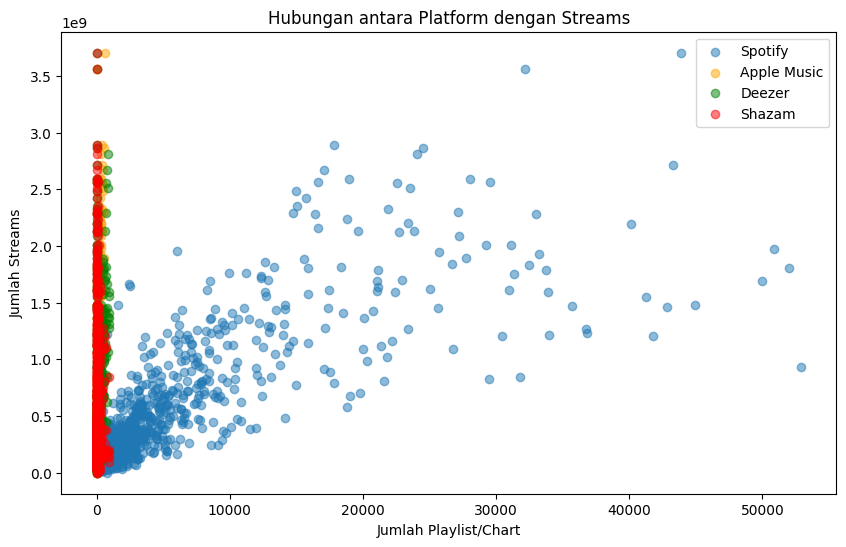


10 Lagu Terpopuler Tahun 2023:
                                track_name              artist(s)_name  \
12                                 Flowers                 Miley Cyrus   
6                          Ella Baila Sola  Eslabon Armado, Peso Pluma   
133  Shakira: Bzrp Music Sessions, Vol. 53           Shakira, Bizarrap   
34                                     TQG            Karol G, Shakira   
9                          La Bebe - Remix       Peso Pluma, Yng Lvcas   
49                     Die For You - Remix   Ariana Grande, The Weeknd   
10                               un x100to   Bad Bunny, Grupo Frontera   
16                       Cupid - Twin Ver.                 Fifty Fifty   
160                                    PRC   Natanael Cano, Peso Pluma   
131                                    OMG                    NewJeans   

          streams  
12   1.316856e+09  
6    7.259801e+08  
133  7.219756e+08  
34   6.189904e+08  
9    5.536341e+08  
49   5.187451e+08  
10   5.056714

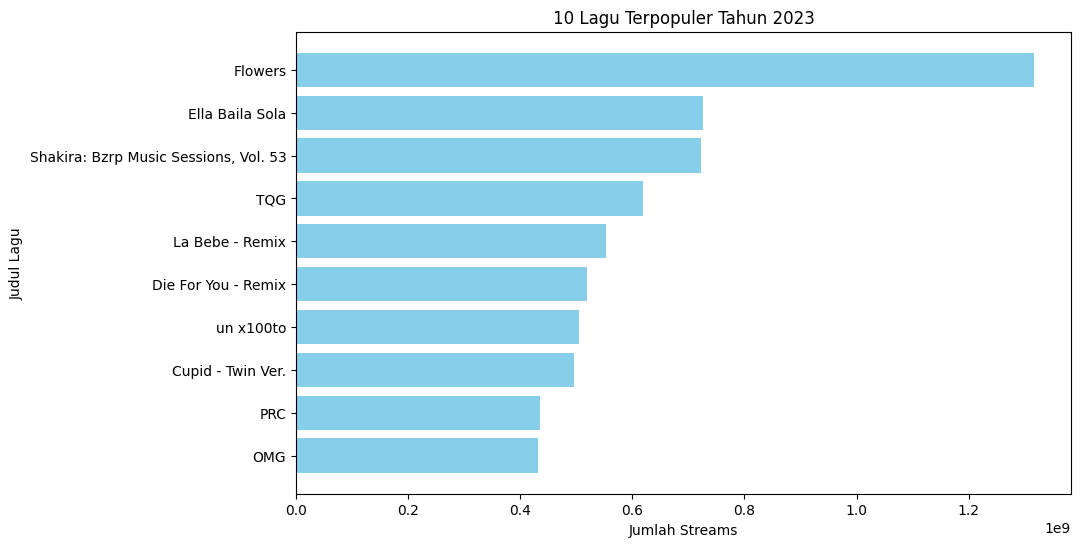


10 Artis Terpopuler Tahun 2023:
artist(s)_name
Miley Cyrus                   1.316856e+09
Morgan Wallen                 9.466940e+08
Eslabon Armado, Peso Pluma    7.259801e+08
Shakira, Bizarrap             7.219756e+08
Jimin                         7.054457e+08
Fifty Fifty                   6.364776e+08
Karol G, Shakira              6.189904e+08
Peso Pluma, Yng Lvcas         5.536341e+08
NewJeans                      5.187948e+08
Ariana Grande, The Weeknd     5.187451e+08
Name: streams, dtype: float64


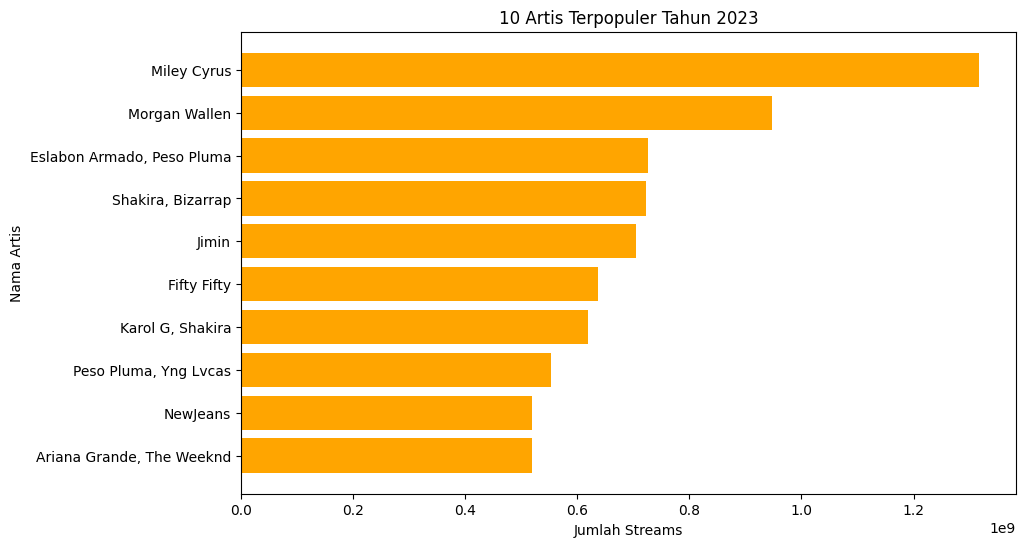


Mean Squared Error (Setting 1 - 80% Training, 20% Testing): 3.2113682966645766e+17

Mean Squared Error (Setting 2 - 50% Training, 50% Testing): 4.4715443986112365e+17

Prediksi 10 Artis Terpopuler Tahun 2024 (Setting 1 - 80% Training, 20% Testing):
     artist(s)_name  prediksi_streams_2024
558    Taylor Swift           1.430024e+10
572      The Weeknd           1.177713e+10
223    Harry Styles           9.570555e+09
159      Ed Sheeran           7.044635e+09
43        Bad Bunny           6.547508e+09
498             SZA           6.125896e+09
38              BTS           6.057351e+09
431  Olivia Rodrigo           5.945453e+09
403       Mï¿½ï¿½ne           5.801043e+09
75       Bruno Mars           5.529225e+09


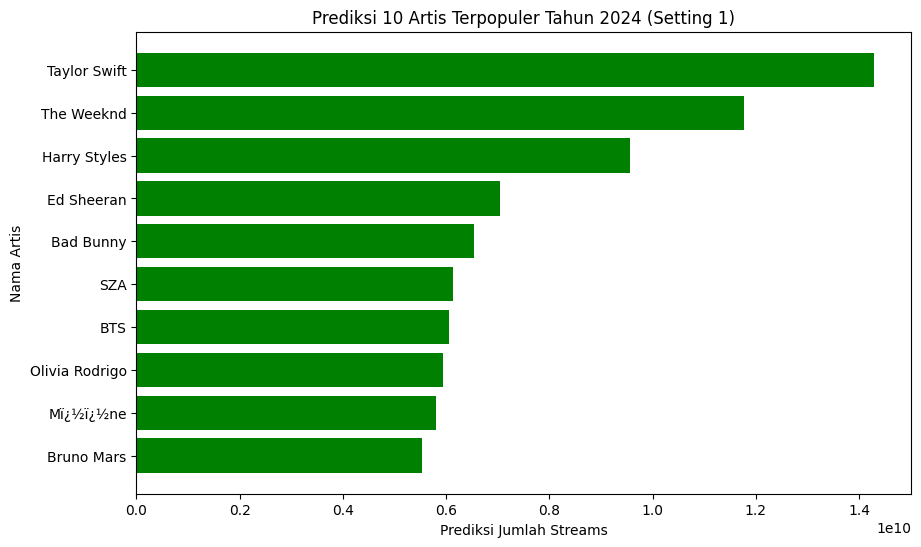


Prediksi 10 Artis Terpopuler Tahun 2024 (Setting 2 - 50% Training, 50% Testing):
     artist(s)_name  prediksi_streams_2024
558    Taylor Swift           1.385417e+10
572      The Weeknd           1.194610e+10
223    Harry Styles           1.035288e+10
159      Ed Sheeran           7.784463e+09
403       Mï¿½ï¿½ne           6.655401e+09
431  Olivia Rodrigo           6.561142e+09
75       Bruno Mars           6.535979e+09
43        Bad Bunny           6.236836e+09
38              BTS           5.857916e+09
25   Arctic Monkeys           5.755306e+09


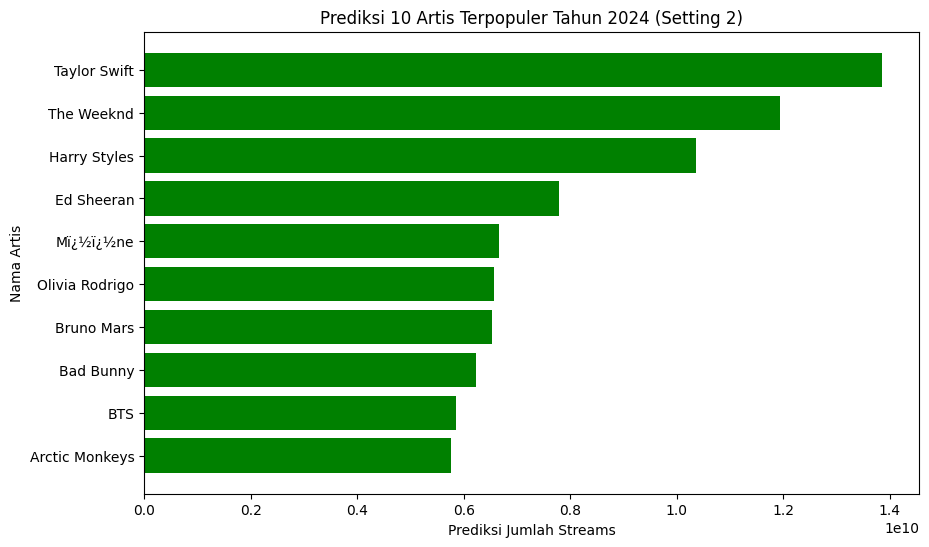


Mean Squared Error untuk Training (Setting 1 - 80% Training, 20% Testing): 5.830045156838998e+17


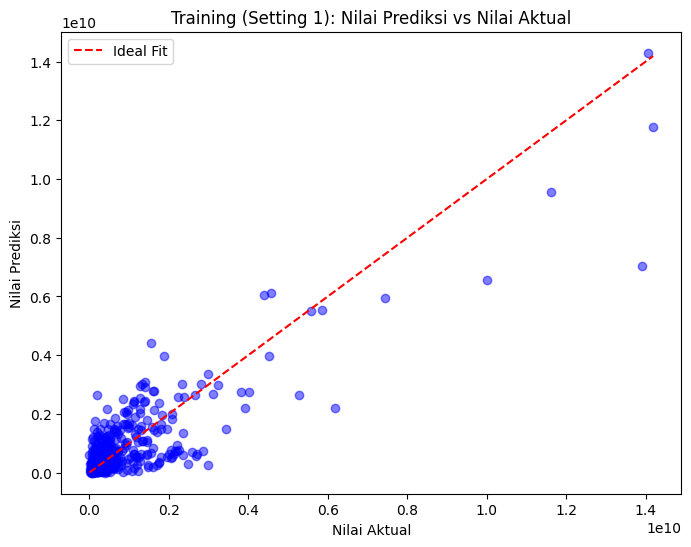

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load data
path_file = 'spotify-2023.csv'
data_spotify = pd.read_csv(path_file, encoding='latin1')

# Membersihkan data
data_spotify['streams'] = pd.to_numeric(data_spotify['streams'], errors='coerce')
data_spotify['playlist_deezer'] = pd.to_numeric(data_spotify['in_deezer_playlists'], errors='coerce')
data_spotify['chart_shazam'] = pd.to_numeric(data_spotify['in_shazam_charts'], errors='coerce')

# Mengisi nilai kosong
data_spotify['streams'] = data_spotify['streams'].fillna(data_spotify['streams'].median())
data_spotify['playlist_deezer'] = data_spotify['playlist_deezer'].fillna(data_spotify['playlist_deezer'].median())
data_spotify['chart_shazam'] = data_spotify['chart_shazam'].fillna(data_spotify['chart_shazam'].median())

# Analisis Korelasi
matriks_korelasi = data_spotify[['streams', 'in_spotify_playlists', 'in_apple_playlists', 'playlist_deezer', 'chart_shazam']].corr()
print("\nMatriks Korelasi:")
print(matriks_korelasi)

# Visualisasi hubungan
plt.figure(figsize=(10, 6))
plt.scatter(data_spotify['in_spotify_playlists'], data_spotify['streams'], alpha=0.5, label='Spotify')
plt.scatter(data_spotify['in_apple_playlists'], data_spotify['streams'], alpha=0.5, label='Apple Music', color='orange')
plt.scatter(data_spotify['playlist_deezer'], data_spotify['streams'], alpha=0.5, label='Deezer', color='green')
plt.scatter(data_spotify['chart_shazam'], data_spotify['streams'], alpha=0.5, label='Shazam', color='red')
plt.xlabel('Jumlah Playlist/Chart')
plt.ylabel('Jumlah Streams')
plt.title('Hubungan antara Platform dengan Streams')
plt.legend()
plt.show()

# Filter data untuk tahun 2023
data_2023 = data_spotify[data_spotify['released_year'] == 2023]

# Mengidentifikasi 10 lagu teratas
lagu_teratas = data_2023[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(10)

# Tampilkan hasil
print("\n10 Lagu Terpopuler Tahun 2023:")
print(lagu_teratas)

# Visualisasi 10 Lagu Terpopuler
plt.figure(figsize=(10, 6))
plt.barh(lagu_teratas['track_name'], lagu_teratas['streams'], color='skyblue')
plt.xlabel('Jumlah Streams')
plt.ylabel('Judul Lagu')
plt.title('10 Lagu Terpopuler Tahun 2023')
plt.gca().invert_yaxis()
plt.show()

# Mengidentifikasi 10 artis teratas berdasarkan jumlah streams agregat
artis_teratas = data_2023.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10)

# Tampilkan hasil
print("\n10 Artis Terpopuler Tahun 2023:")
print(artis_teratas)

# Visualisasi 10 Artis Terpopuler
plt.figure(figsize=(10, 6))
plt.barh(artis_teratas.index, artis_teratas.values, color='orange')
plt.xlabel('Jumlah Streams')
plt.ylabel('Nama Artis')
plt.title('10 Artis Terpopuler Tahun 2023')
plt.gca().invert_yaxis()
plt.show()

# Menyiapkan data untuk regresi
grup_artis = data_spotify.groupby('artist(s)_name').agg({
    'streams': 'sum',
    'in_spotify_charts': 'sum',
    'in_apple_charts': 'sum',
    'playlist_deezer': 'sum',
    'chart_shazam': 'sum'
}).reset_index()

X = grup_artis[['in_spotify_charts', 'in_apple_charts', 'playlist_deezer', 'chart_shazam']]
y = grup_artis['streams']

# Setting 1: 80% untuk training, 20% untuk testing
X_latih_80, X_uji_80, y_latih_80, y_uji_80 = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model regresi dengan data training 80%
model_80 = LinearRegression()
model_80.fit(X_latih_80, y_latih_80)

# Memprediksi streams data uji
y_prediksi_80 = model_80.predict(X_uji_80)
mse_80 = mean_squared_error(y_uji_80, y_prediksi_80)
print(f"\nMean Squared Error (Setting 1 - 80% Training, 20% Testing): {mse_80}")

# Setting 2: 50% untuk training, 50% untuk testing
X_latih_50, X_uji_50, y_latih_50, y_uji_50 = train_test_split(X, y, test_size=0.5, random_state=42)

# Melatih model regresi dengan data training 50%
model_50 = LinearRegression()
model_50.fit(X_latih_50, y_latih_50)

# Memprediksi streams data uji
y_prediksi_50 = model_50.predict(X_uji_50)
mse_50 = mean_squared_error(y_uji_50, y_prediksi_50)
print(f"\nMean Squared Error (Setting 2 - 50% Training, 50% Testing): {mse_50}")

# Prediksi artis terpopuler tahun 2024 (menggunakan data setting 80%)
prediksi_streams_80 = model_80.predict(X)
grup_artis['prediksi_streams_2024'] = prediksi_streams_80
artis_teratas_2024_80 = grup_artis[['artist(s)_name', 'prediksi_streams_2024']].sort_values(by='prediksi_streams_2024', ascending=False).head(10)

print("\nPrediksi 10 Artis Terpopuler Tahun 2024 (Setting 1 - 80% Training, 20% Testing):")
print(artis_teratas_2024_80)

# Plot Prediksi 10 Artis Terpopuler Tahun 2024 (Setting 1)
plt.figure(figsize=(10, 6))
plt.barh(artis_teratas_2024_80['artist(s)_name'], artis_teratas_2024_80['prediksi_streams_2024'], color='green')
plt.xlabel('Prediksi Jumlah Streams')
plt.ylabel('Nama Artis')
plt.title('Prediksi 10 Artis Terpopuler Tahun 2024 (Setting 1)')
plt.gca().invert_yaxis()
plt.show()

# Prediksi artis terpopuler tahun 2024 (menggunakan data setting 50%)
prediksi_streams_50 = model_50.predict(X)
grup_artis['prediksi_streams_2024'] = prediksi_streams_50
artis_teratas_2024_50 = grup_artis[['artist(s)_name', 'prediksi_streams_2024']].sort_values(by='prediksi_streams_2024', ascending=False).head(10)

print("\nPrediksi 10 Artis Terpopuler Tahun 2024 (Setting 2 - 50% Training, 50% Testing):")
print(artis_teratas_2024_50)

# Plot Prediksi 10 Artis Terpopuler Tahun 2024 (Setting 2)
plt.figure(figsize=(10, 6))
plt.barh(artis_teratas_2024_50['artist(s)_name'], artis_teratas_2024_50['prediksi_streams_2024'], color='green')
plt.xlabel('Prediksi Jumlah Streams')
plt.ylabel('Nama Artis')
plt.title('Prediksi 10 Artis Terpopuler Tahun 2024 (Setting 2)')
plt.gca().invert_yaxis()
plt.show()

# Prediksi untuk data training (Setting 1)
y_pred_train_80 = model_80.predict(X_latih_80)

# Menghitung Mean Squared Error (MSE) untuk data training (Setting 1)
mse_train_80 = mean_squared_error(y_latih_80, y_pred_train_80)
print(f"\nMean Squared Error untuk Training (Setting 1 - 80% Training, 20% Testing): {mse_train_80}")

# Visualisasi Prediksi vs Nilai Aktual pada data Training (Setting 1)
plt.figure(figsize=(8, 6))
plt.scatter(y_latih_80, y_pred_train_80, alpha=0.5, color='blue')
plt.plot([y_latih_80.min(), y_latih_80.max()], [y_latih_80.min(), y_latih_80.max()], '--', color='red', label='Ideal Fit')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Training (Setting 1): Nilai Prediksi vs Nilai Aktual')
plt.legend()
plt.show()



Mean Squared Error (Setting 1 - 80% Training, 20% Testing): 3.2113682966645766e+17

Mean Squared Error (Setting 2 - 50% Training, 50% Testing): 4.4715443986112365e+17


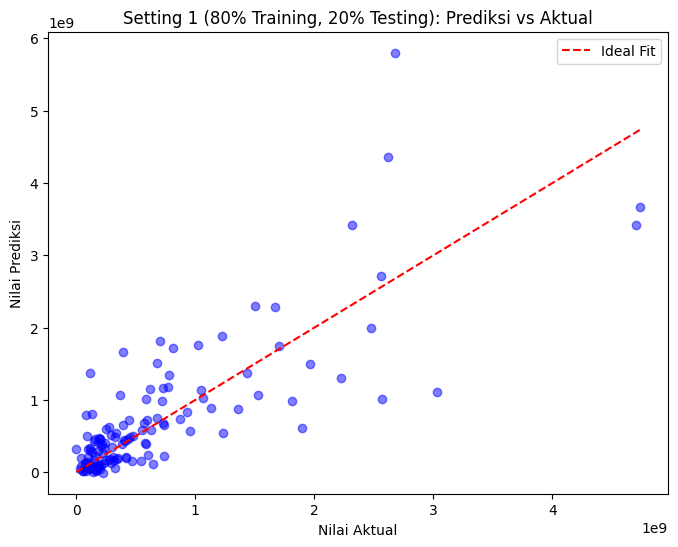

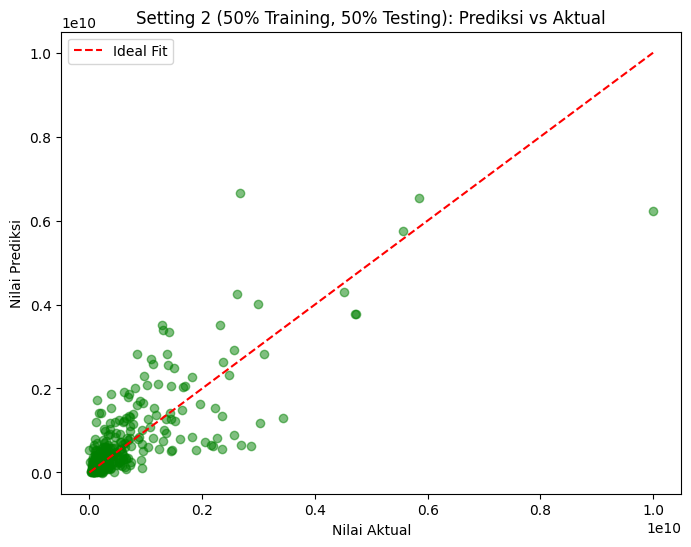


Matriks MSE:
Setting 1 (80% Training, 20% Testing) - MSE: 3.2113682966645766e+17
Setting 2 (50% Training, 50% Testing) - MSE: 4.4715443986112365e+17


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Menyiapkan data
path_file = 'spotify-2023.csv'
data_spotify = pd.read_csv(path_file, encoding='latin1')

# Membersihkan data
data_spotify['streams'] = pd.to_numeric(data_spotify['streams'], errors='coerce')
data_spotify['playlist_deezer'] = pd.to_numeric(data_spotify['in_deezer_playlists'], errors='coerce')
data_spotify['chart_shazam'] = pd.to_numeric(data_spotify['in_shazam_charts'], errors='coerce')

# Mengisi nilai kosong
data_spotify['streams'] = data_spotify['streams'].fillna(data_spotify['streams'].median())
data_spotify['playlist_deezer'] = data_spotify['playlist_deezer'].fillna(data_spotify['playlist_deezer'].median())
data_spotify['chart_shazam'] = data_spotify['chart_shazam'].fillna(data_spotify['chart_shazam'].median())

# Menyiapkan data untuk regresi
grup_artis = data_spotify.groupby('artist(s)_name').agg({
    'streams': 'sum',
    'in_spotify_charts': 'sum',
    'in_apple_charts': 'sum',
    'playlist_deezer': 'sum',
    'chart_shazam': 'sum'
}).reset_index()

X = grup_artis[['in_spotify_charts', 'in_apple_charts', 'playlist_deezer', 'chart_shazam']]
y = grup_artis['streams']

# Setting 1: 80% untuk training, 20% untuk testing
X_latih_80, X_uji_80, y_latih_80, y_uji_80 = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model regresi dengan data training 80%
model_80 = LinearRegression()
model_80.fit(X_latih_80, y_latih_80)

# Memprediksi streams data uji
y_prediksi_80 = model_80.predict(X_uji_80)

# Menghitung Mean Squared Error (MSE) untuk Setting 1
mse_80 = mean_squared_error(y_uji_80, y_prediksi_80)
print(f"\nMean Squared Error (Setting 1 - 80% Training, 20% Testing): {mse_80}")

# Setting 2: 50% untuk training, 50% untuk testing
X_latih_50, X_uji_50, y_latih_50, y_uji_50 = train_test_split(X, y, test_size=0.5, random_state=42)

# Melatih model regresi dengan data training 50%
model_50 = LinearRegression()
model_50.fit(X_latih_50, y_latih_50)

# Memprediksi streams data uji
y_prediksi_50 = model_50.predict(X_uji_50)

# Menghitung Mean Squared Error (MSE) untuk Setting 2
mse_50 = mean_squared_error(y_uji_50, y_prediksi_50)
print(f"\nMean Squared Error (Setting 2 - 50% Training, 50% Testing): {mse_50}")

# Visualisasi Prediksi vs Nilai Aktual (Setting 1 - 80% Training, 20% Testing)
plt.figure(figsize=(8, 6))
plt.scatter(y_uji_80, y_prediksi_80, alpha=0.5, color='blue')
plt.plot([y_uji_80.min(), y_uji_80.max()], [y_uji_80.min(), y_uji_80.max()], '--', color='red', label='Ideal Fit')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title(f'Setting 1 (80% Training, 20% Testing): Prediksi vs Aktual')
plt.legend()
plt.show()

# Visualisasi Prediksi vs Nilai Aktual (Setting 2 - 50% Training, 50% Testing)
plt.figure(figsize=(8, 6))
plt.scatter(y_uji_50, y_prediksi_50, alpha=0.5, color='green')
plt.plot([y_uji_50.min(), y_uji_50.max()], [y_uji_50.min(), y_uji_50.max()], '--', color='red', label='Ideal Fit')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title(f'Setting 2 (50% Training, 50% Testing): Prediksi vs Aktual')
plt.legend()
plt.show()

# Menampilkan informasi MSE
print("\nMatriks MSE:")
print(f"Setting 1 (80% Training, 20% Testing) - MSE: {mse_80}")
print(f"Setting 2 (50% Training, 50% Testing) - MSE: {mse_50}")


 Setting 1 (80% data untuk training dan 20% data untuk testing), MSE dapat dihitung sebagai berikut:

In [ ]:
# Prediksi untuk data training (Setting 1 - 80% Training)
y_pred_train_80 = model_80.predict(X_latih_80)

# Menghitung MSE untuk data training (Setting 1)
mse_train_80 = mean_squared_error(y_latih_80, y_pred_train_80)
print(f"Mean Squared Error untuk Training Set 1 (80% Training): {mse_train_80}")


Mean Squared Error untuk Training Set 1 (80% Training): 5.830045156838998e+17


 Setting 2 (50% data untuk training dan 50% data untuk testing), MSE dihitung sebagai berikut:

In [ ]:
# Prediksi untuk data training (Setting 2 - 50% Training)
y_pred_train_50 = model_50.predict(X_latih_50)

# Menghitung MSE untuk data training (Setting 2)
mse_train_50 = mean_squared_error(y_latih_50, y_pred_train_50)
print(f"Mean Squared Error untuk Training Set 2 (50% Training): {mse_train_50}")


Mean Squared Error untuk Training Set 2 (50% Training): 6.651005388826721e+17


Setting 1 (80% Training, 20% Testing):

In [ ]:
print(f"Mean Squared Error untuk Testing Set 1 (80% Training, 20% Testing): {mse_80}")


Mean Squared Error untuk Testing Set 1 (80% Training, 20% Testing): 3.2113682966645766e+17


Setting 2 (50% Training, 50% Testing):

In [ ]:
print(f"Mean Squared Error untuk Testing Set 2 (50% Training, 50% Testing): {mse_50}")


Mean Squared Error untuk Testing Set 2 (50% Training, 50% Testing): 4.4715443986112365e+17


 Grafik Prediksi vs Nilai Aktual:

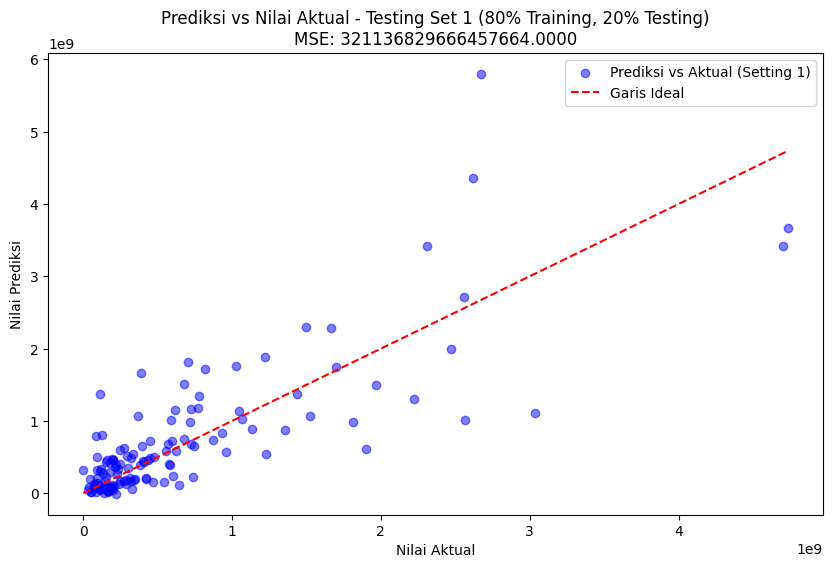

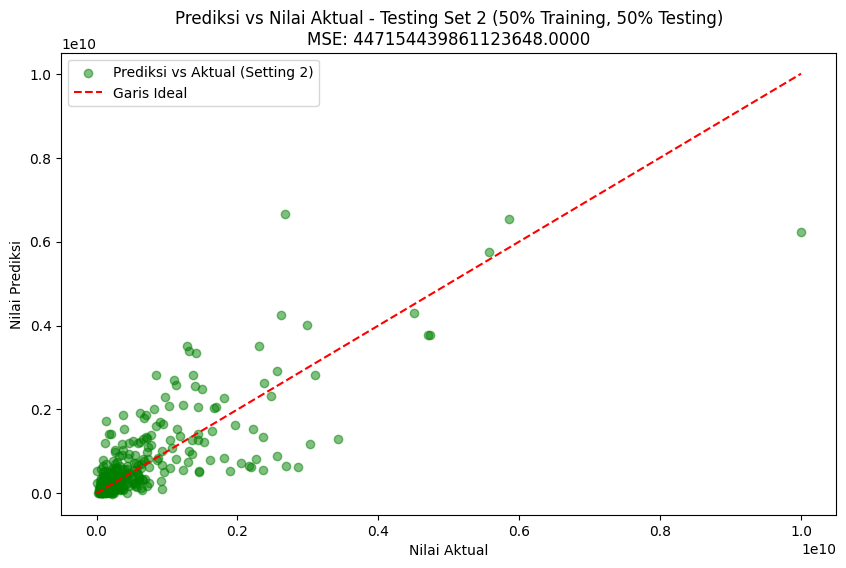

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Prediksi untuk data testing (Setting 1 dan Setting 2)
y_pred_test_80 = model_80.predict(X_uji_80)
y_pred_test_50 = model_50.predict(X_uji_50)

# Menghitung MSE untuk data testing (Setting 1 dan Setting 2)
mse_test_80 = mean_squared_error(y_uji_80, y_pred_test_80)
mse_test_50 = mean_squared_error(y_uji_50, y_pred_test_50)

# Plot Prediksi vs Nilai Aktual untuk Setting 1 (80% Training, 20% Testing)
plt.figure(figsize=(10, 6))
plt.scatter(y_uji_80, y_pred_test_80, alpha=0.5, color='blue', label='Prediksi vs Aktual (Setting 1)')

# Garis ideal (Prediksi = Aktual)
plt.plot([y_uji_80.min(), y_uji_80.max()], [y_uji_80.min(), y_uji_80.max()], '--', color='red', label='Garis Ideal')

plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title(f'Prediksi vs Nilai Aktual - Testing Set 1 (80% Training, 20% Testing)\nMSE: {mse_test_80:.4f}')
plt.legend()
plt.show()

# Plot Prediksi vs Nilai Aktual untuk Setting 2 (50% Training, 50% Testing)
plt.figure(figsize=(10, 6))
plt.scatter(y_uji_50, y_pred_test_50, alpha=0.5, color='green', label='Prediksi vs Aktual (Setting 2)')

# Garis ideal (Prediksi = Aktual)
plt.plot([y_uji_50.min(), y_uji_50.max()], [y_uji_50.min(), y_uji_50.max()], '--', color='red', label='Garis Ideal')

plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title(f'Prediksi vs Nilai Aktual - Testing Set 2 (50% Training, 50% Testing)\nMSE: {mse_test_50:.4f}')
plt.legend()
plt.show()
